
#  Training with customdataset 1

In [14]:
# Imports
import pathlib
import torch

import albumentations
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from skimage.transform import resize
from customdatasets import SegmentationDataSet1
from transformations import ComposeDouble, AlbuSeg2d, FunctionWrapperDouble, normalize_01, create_dense_target
from unet import UNet
from trainer import Trainer


# root directory
root = pathlib.Path.cwd() / 'Carvana'


def get_filenames_of_path(path: pathlib.Path, ext: str = '*'):
    """Returns a list of files in a directory/path. Uses pathlib."""
    filenames = [file for file in path.glob(ext) if file.is_file()]
    return filenames


# input and target files
inputs = get_filenames_of_path(root / 'Input')
targets = get_filenames_of_path(root / 'Target')

# training transformations and augmentations
transforms_training = ComposeDouble([
    FunctionWrapperDouble(resize,
                          input=True,
                          target=False,
                          output_shape=(128, 128, 3)),
    FunctionWrapperDouble(resize,
                          input=False,
                          target=True,
                          output_shape=(128, 128),
                          order=0,
                          anti_aliasing=False,
                          preserve_range=True),
    AlbuSeg2d(albumentations.HorizontalFlip(p=0.5)),
    FunctionWrapperDouble(create_dense_target, input=False, target=True),
    FunctionWrapperDouble(np.moveaxis, input=True, target=False, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# validation transformations
transforms_validation = ComposeDouble([
    FunctionWrapperDouble(resize,
                          input=True,
                          target=False,
                          output_shape=(128, 128, 3)),
    FunctionWrapperDouble(resize,
                          input=False,
                          target=True,
                          output_shape=(128, 128),
                          order=0,
                          anti_aliasing=False,
                          preserve_range=True),
    FunctionWrapperDouble(create_dense_target, input=False, target=True),
    FunctionWrapperDouble(np.moveaxis, input=True, target=False, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# random seed
random_seed = 42

# split dataset into training set and validation set
train_size = 0.8  # 80:20 split

inputs_train, inputs_valid = train_test_split(
    inputs,
    random_state=random_seed,
    train_size=train_size,
    shuffle=True)

targets_train, targets_valid = train_test_split(
    targets,
    random_state=random_seed,
    train_size=train_size,
    shuffle=True)

# inputs_train, inputs_valid = inputs[:80], inputs[80:]
# targets_train, targets_valid = targets[:80], targets[:80]

# dataset training
dataset_train = SegmentationDataSet1(inputs=inputs_train,
                                    targets=targets_train,
                                    transform=transforms_training)

# dataset validation
dataset_valid = SegmentationDataSet1(inputs=inputs_valid,
                                    targets=targets_valid,
                                    transform=transforms_validation)

# dataloader training
dataloader_training = DataLoader(dataset=dataset_train,
                                 batch_size=2,
                                 shuffle=True)

# dataloader validation
dataloader_validation = DataLoader(dataset=dataset_valid,
                                   batch_size=2,
                                   shuffle=True)

In [2]:
lrf.plot()

In [3]:
lrf.plot()

In [4]:
# open napari instance for validation dataset
# navigate with 'n' for next and 'b' for back on the keyboard
dataset_viewer_validation.napari()

In [5]:
# device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# model
model = UNet(in_channels=3,
             out_channels=2,
             n_blocks=4,
             start_filters=32,
             activation='relu',
             normalization='batch',
             conv_mode='same',
             dim=2).to(device)

# criterion
criterion = torch.nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# trainer
trainer = Trainer(model=model,
                  device=device,
                  criterion=criterion,
                  optimizer=optimizer,
                  training_DataLoader=dataloader_training,
                  validation_DataLoader=dataloader_validation,
                  lr_scheduler=None,
                  epochs=2,
                  epoch=0,
                  notebook=True)

# start training
training_losses, validation_losses, lr_rates = trainer.run_trainer()

Progress:   0%|          | 0/2 [00:00<?, ?it/s]

debut1: ******************: i:  0


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  1.105824589729309


debug: ************************ i:  1
loss_value:  0.8571251034736633


debug: ************************ i:  2
loss_value:  0.787492036819458


debug: ************************ i:  3
loss_value:  0.7076106071472168


debug: ************************ i:  4
loss_value:  0.7883661389350891


debug: ************************ i:  5
loss_value:  0.6890172362327576


debug: ************************ i:  6
loss_value:  0.7915973663330078


debug: ************************ i:  7
loss_value:  0.7193016409873962


debug: ************************ i:  8
loss_value:  0.74188232421875


debug: ************************ i:  9
loss_value:  0.6433687806129456


debug: ************************ i:  10
loss_value:  0.6298946738243103


debug: ************************ i:  11
loss_value:  0.612417459487915


debug: ************************ i:  12
loss_value:  0.6288354396820068


debug: ************************ i:  13
loss_value:  0.6048170328140259


debug: ************************ i:  14
loss_value:  0.5429078340530396


debug: ************************ i:  15
loss_value:  0.5584844350814819


debug: ************************ i:  16
loss_value:  0.6489334106445312


debug: ************************ i:  17
loss_value:  0.5211887359619141


debug: ************************ i:  18
loss_value:  0.5209659337997437


debug: ************************ i:  19
loss_value:  0.5027662515640259


debug: ************************ i:  20
loss_value:  0.5819487571716309


debug: ************************ i:  21
loss_value:  0.5790315270423889


debug: ************************ i:  22
loss_value:  0.4875122010707855


debug: ************************ i:  23
loss_value:  0.5184269547462463


debug: ************************ i:  24
loss_value:  0.49982041120529175


debug: ************************ i:  25
loss_value:  0.4770689606666565


debug: ************************ i:  26
loss_value:  0.41619816422462463


debug: ************************ i:  27
loss_value:  0.5731850862503052


debug: ************************ i:  28
loss_value:  0.4528719186782837


debug: ************************ i:  29
loss_value:  0.5194214582443237


debug: ************************ i:  30
loss_value:  0.5104613900184631


debug: ************************ i:  31
loss_value:  0.38951271772384644


debug: ************************ i:  32
loss_value:  0.430901437997818


debug: ************************ i:  33
loss_value:  0.4378446638584137


debug: ************************ i:  34
loss_value:  0.39963507652282715


debug: ************************ i:  35
loss_value:  0.42268288135528564


debug: ************************ i:  36
loss_value:  0.4161814749240875


debug: ************************ i:  37
loss_value:  0.419813334941864


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  1


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.469500333070755


debug: ************************ i:  1
loss_value:  0.3849108815193176


debug: ************************ i:  2
loss_value:  0.4047730565071106


debug: ************************ i:  3
loss_value:  0.3561212420463562


debug: ************************ i:  4
loss_value:  0.3748166859149933


debug: ************************ i:  5
loss_value:  0.35984987020492554


debug: ************************ i:  6
loss_value:  0.36337676644325256


debug: ************************ i:  7
loss_value:  0.41514572501182556


debug: ************************ i:  8
loss_value:  0.3775252401828766


debug: ************************ i:  9
loss_value:  0.33571651577949524


debug: ************************ i:  10
loss_value:  0.28874608874320984


debug: ************************ i:  11
loss_value:  0.32822030782699585


debug: ************************ i:  12
loss_value:  0.27891844511032104


debug: ************************ i:  13
loss_value:  0.34827035665512085


debug: ************************ i:  14
loss_value:  0.38035500049591064


debug: ************************ i:  15
loss_value:  0.3295643925666809


debug: ************************ i:  16
loss_value:  0.3833068907260895


debug: ************************ i:  17
loss_value:  0.37321045994758606


debug: ************************ i:  18
loss_value:  0.3683726191520691


debug: ************************ i:  19
loss_value:  0.31396934390068054


debug: ************************ i:  20
loss_value:  0.3031963109970093


debug: ************************ i:  21
loss_value:  0.2836092412471771


debug: ************************ i:  22
loss_value:  0.26359468698501587


debug: ************************ i:  23
loss_value:  0.26624199748039246


debug: ************************ i:  24
loss_value:  0.2289363145828247


debug: ************************ i:  25
loss_value:  0.2400210052728653


debug: ************************ i:  26
loss_value:  0.2724394202232361


debug: ************************ i:  27
loss_value:  0.3439943194389343


debug: ************************ i:  28
loss_value:  0.2576870024204254


debug: ************************ i:  29
loss_value:  0.270292192697525


debug: ************************ i:  30
loss_value:  0.30250993371009827


debug: ************************ i:  31
loss_value:  0.27536407113075256


debug: ************************ i:  32
loss_value:  0.26732078194618225


debug: ************************ i:  33
loss_value:  0.23387397825717926


debug: ************************ i:  34
loss_value:  0.2279788702726364


debug: ************************ i:  35
loss_value:  0.27611806988716125


debug: ************************ i:  36
loss_value:  0.21604107320308685


debug: ************************ i:  37
loss_value:  0.22532957792282104


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

# Training with customdataset 2

In [6]:
# Imports
import pathlib
from transformations import ComposeDouble, normalize_01, AlbuSeg2d, FunctionWrapperDouble, create_dense_target
from sklearn.model_selection import train_test_split
from customdatasets import SegmentationDataSet2
import torch
import numpy as np
from unet import UNet
from trainer import Trainer
from torch.utils.data import DataLoader
from skimage.transform import resize
import albumentations

# root directory
root = pathlib.Path.cwd() / 'Carvana'
def get_filenames_of_path(path: pathlib.Path, ext: str = '*'):
    """Returns a list of files in a directory/path. Uses pathlib."""
    filenames = [file for file in path.glob(ext) if file.is_file()]
    return filenames

# input and target files
inputs = get_filenames_of_path(root / 'Input')
targets = get_filenames_of_path(root / 'Target')

# pre-transformations
pre_transforms = ComposeDouble([
    FunctionWrapperDouble(resize,
                          input=True,
                          target=False,
                          output_shape=(128, 128, 3)),
    FunctionWrapperDouble(resize,
                          input=False,
                          target=True,
                          output_shape=(128, 128),
                          order=0,
                          anti_aliasing=False,
                          preserve_range=True),
])

# training transformations and augmentations
transforms_training = ComposeDouble([
    AlbuSeg2d(albumentations.HorizontalFlip(p=0.5)),
    FunctionWrapperDouble(create_dense_target, input=False, target=True),
    FunctionWrapperDouble(np.moveaxis, input=True, target=False, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# validation transformations
transforms_validation = ComposeDouble([
    FunctionWrapperDouble(resize,
                          input=True,
                          target=False,
                          output_shape=(128, 128, 3)),
    FunctionWrapperDouble(resize,
                          input=False,
                          target=True,
                          output_shape=(128, 128),
                          order=0,
                          anti_aliasing=False,
                          preserve_range=True),
    FunctionWrapperDouble(create_dense_target, input=False, target=True),
    FunctionWrapperDouble(np.moveaxis, input=True, target=False, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# random seed
random_seed = 42

# split dataset into training set and validation set
train_size = 0.8  # 80:20 split

inputs_train, inputs_valid = train_test_split(
    inputs,
    random_state=random_seed,
    train_size=train_size,
    shuffle=True)

targets_train, targets_valid = train_test_split(
    targets,
    random_state=random_seed,
    train_size=train_size,
    shuffle=True)

# inputs_train, inputs_valid = inputs[:80], inputs[80:]
# targets_train, targets_valid = targets[:80], targets[:80]

# dataset training
dataset_train = SegmentationDataSet2(inputs=inputs_train,
                                    targets=targets_train,
                                    transform=transforms_training,
                                    use_cache=True,
                                    pre_transform=pre_transforms)

# dataset validation
dataset_valid = SegmentationDataSet2(inputs=inputs_valid,
                                    targets=targets_valid,
                                    transform=transforms_validation,
                                    use_cache=True,
                                    pre_transform=pre_transforms)

# dataloader training
dataloader_training = DataLoader(dataset=dataset_train,
                                 batch_size=2,
                                 shuffle=True)

# dataloader validation
dataloader_validation = DataLoader(dataset=dataset_valid,
                                   batch_size=2,
                                   shuffle=True)


Caching:   0%|          | 0/76 [00:00<?, ?it/s]

Caching:   0%|          | 0/20 [00:00<?, ?it/s]

In [7]:
# create DatasetViewer instances
from visual import DatasetViewer
dataset_viewer_training = DatasetViewer(dataset_train)
dataset_viewer_validation = DatasetViewer(dataset_valid)

In [8]:
# open napari instance for training dataset
# navigate with 'n' for next and 'b' for back on the keyboard
dataset_viewer_training.napari()

In [9]:
# open napari instance for validation dataset
# navigate with 'n' for next and 'b' for back on the keyboard
dataset_viewer_validation.napari()

In [10]:
# device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# model
model = UNet(in_channels=3,
             out_channels=2,
             n_blocks=4,
             start_filters=32,
             activation='relu',
             normalization='batch',
             conv_mode='same',
             dim=2).to(device)

# criterion
criterion = torch.nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# trainer
trainer = Trainer(model=model,
                  device=device,
                  criterion=criterion,
                  optimizer=optimizer,
                  training_DataLoader=dataloader_training,
                  validation_DataLoader=dataloader_validation,
                  lr_scheduler=None,
                  epochs=10,
                  epoch=0,
                  notebook=True)

# start training
training_losses, validation_losses, lr_rates = trainer.run_trainer()

Progress:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  0


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  1.0030770301818848
debug: ************************ i:  1
loss_value:  0.9241324067115784


debug: ************************ i:  2
loss_value:  0.8708378076553345
debug: ************************ i:  3
loss_value:  0.816340982913971


debug: ************************ i:  4
loss_value:  0.8046272397041321
debug: ************************ i:  5
loss_value:  0.7733401656150818


debug: ************************ i:  6
loss_value:  0.7614906430244446
debug: ************************ i:  7
loss_value:  0.6847642660140991


debug: ************************ i:  8
loss_value:  0.6784585118293762


debug: ************************ i:  9
loss_value:  0.6617327332496643


debug: ************************ i:  10
loss_value:  0.6674027442932129


debug: ************************ i:  11
loss_value:  0.556259274482727


debug: ************************ i:  12
loss_value:  0.6151694059371948
debug: ************************ i:  13
loss_value:  0.5139374136924744


debug: ************************ i:  14
loss_value:  0.5542778968811035
debug: ************************ i:  15
loss_value:  0.5364852547645569


debug: ************************ i:  16
loss_value:  0.6633196473121643
debug: ************************ i:  17
loss_value:  0.528465747833252


debug: ************************ i:  18
loss_value:  0.5404260754585266
debug: ************************ i:  19
loss_value:  0.6033908128738403


debug: ************************ i:  20
loss_value:  0.5333570241928101


debug: ************************ i:  21
loss_value:  0.5072013735771179


debug: ************************ i:  22
loss_value:  0.48745036125183105


debug: ************************ i:  23
loss_value:  0.4039144814014435


debug: ************************ i:  24
loss_value:  0.4530732035636902


debug: ************************ i:  25
loss_value:  0.5797080993652344


debug: ************************ i:  26
loss_value:  0.45492032170295715


debug: ************************ i:  27
loss_value:  0.39140376448631287


debug: ************************ i:  28
loss_value:  0.41384652256965637


debug: ************************ i:  29
loss_value:  0.4600321650505066


debug: ************************ i:  30
loss_value:  0.4411132335662842
debug: ************************ i:  31
loss_value:  0.3371105492115021


debug: ************************ i:  32
loss_value:  0.41028597950935364
debug: ************************ i:  33
loss_value:  0.4329933226108551


debug: ************************ i:  34
loss_value:  0.4263189733028412
debug: ************************ i:  35
loss_value:  0.3934767246246338


debug: ************************ i:  36
loss_value:  0.4523695111274719
debug: ************************ i:  37
loss_value:  0.38791999220848083


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  1


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.33183249831199646
debug: ************************ i:  1
loss_value:  0.3203514814376831


debug: ************************ i:  2
loss_value:  0.39257052540779114
debug: ************************ i:  3
loss_value:  0.444110631942749


debug: ************************ i:  4
loss_value:  0.36618706583976746
debug: ************************ i:  5
loss_value:  0.43381696939468384


debug: ************************ i:  6
loss_value:  0.4202116131782532
debug: ************************ i:  7
loss_value:  0.3182155191898346


debug: ************************ i:  8
loss_value:  0.30649080872535706
debug: ************************ i:  9
loss_value:  0.2590344548225403


debug: ************************ i:  10
loss_value:  0.30953651666641235
debug: ************************ i:  11
loss_value:  0.3667530417442322


debug: ************************ i:  12
loss_value:  0.3075804114341736


debug: ************************ i:  13
loss_value:  0.3120986521244049
debug: ************************ i:  14
loss_value:  0.35481780767440796


debug: ************************ i:  15
loss_value:  0.28797000646591187
debug: ************************ i:  16
loss_value:  0.29032301902770996


debug: ************************ i:  17
loss_value:  0.27217626571655273
debug: ************************ i:  18
loss_value:  0.23639334738254547


debug: ************************ i:  19
loss_value:  0.26981136202812195


debug: ************************ i:  20
loss_value:  0.28980332612991333


debug: ************************ i:  21
loss_value:  0.36515599489212036
debug: ************************ i:  22
loss_value:  0.3594185411930084


debug: ************************ i:  23
loss_value:  0.2968394160270691
debug: ************************ i:  24
loss_value:  0.3241257071495056


debug: ************************ i:  25
loss_value:  0.26464518904685974
debug: ************************ i:  26
loss_value:  0.3342790901660919


debug: ************************ i:  27
loss_value:  0.2794027030467987
debug: ************************ i:  28
loss_value:  0.2624874413013458


debug: ************************ i:  29
loss_value:  0.2103366106748581


debug: ************************ i:  30
loss_value:  0.27875715494155884
debug: ************************ i:  31
loss_value:  0.2516457736492157


debug: ************************ i:  32
loss_value:  0.2844879627227783
debug: ************************ i:  33
loss_value:  0.22951602935791016


debug: ************************ i:  34
loss_value:  0.2975238561630249
debug: ************************ i:  35
loss_value:  0.21564124524593353


debug: ************************ i:  36
loss_value:  0.19795702397823334
debug: ************************ i:  37
loss_value:  0.182633176445961


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  2


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.2274077981710434


debug: ************************ i:  1
loss_value:  0.24711011350154877
debug: ************************ i:  2
loss_value:  0.20396606624126434


debug: ************************ i:  3
loss_value:  0.2671360969543457


debug: ************************ i:  4
loss_value:  0.2430090755224228


debug: ************************ i:  5
loss_value:  0.2313680350780487


debug: ************************ i:  6
loss_value:  0.18143300712108612


debug: ************************ i:  7
loss_value:  0.19171205163002014


debug: ************************ i:  8
loss_value:  0.2517501413822174


debug: ************************ i:  9
loss_value:  0.21945802867412567
debug: ************************ i:  10
loss_value:  0.20909158885478973


debug: ************************ i:  11
loss_value:  0.19488240778446198
debug: ************************ i:  12
loss_value:  0.21300125122070312


debug: ************************ i:  13
loss_value:  0.20513519644737244


debug: ************************ i:  14
loss_value:  0.17643393576145172


debug: ************************ i:  15
loss_value:  0.18787680566310883


debug: ************************ i:  16
loss_value:  0.19212085008621216


debug: ************************ i:  17
loss_value:  0.19364683330059052
debug: ************************ i:  18
loss_value:  0.239182248711586


debug: ************************ i:  19
loss_value:  0.18252982199192047
debug: ************************ i:  20
loss_value:  0.2143452763557434


debug: ************************ i:  21
loss_value:  0.2121589630842209


debug: ************************ i:  22
loss_value:  0.20105715095996857


debug: ************************ i:  23
loss_value:  0.19944773614406586
debug: ************************ i:  24
loss_value:  0.19334688782691956


debug: ************************ i:  25
loss_value:  0.16540926694869995
debug: ************************ i:  26
loss_value:  0.19660590589046478


debug: ************************ i:  27
loss_value:  0.18350288271903992


debug: ************************ i:  28
loss_value:  0.17266401648521423


debug: ************************ i:  29
loss_value:  0.14876802265644073
debug: ************************ i:  30
loss_value:  0.19547425210475922


debug: ************************ i:  31
loss_value:  0.13583271205425262


debug: ************************ i:  32
loss_value:  0.15566769242286682


debug: ************************ i:  33
loss_value:  0.19201791286468506


debug: ************************ i:  34
loss_value:  0.16128601133823395


debug: ************************ i:  35
loss_value:  0.1555604487657547


debug: ************************ i:  36
loss_value:  0.14387187361717224


debug: ************************ i:  37
loss_value:  0.1344045251607895


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  3


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.17990043759346008
debug: ************************ i:  1
loss_value:  0.211882084608078


debug: ************************ i:  2
loss_value:  0.1270217001438141


debug: ************************ i:  3
loss_value:  0.1641170084476471
debug: ************************ i:  4
loss_value:  0.13533422350883484


debug: ************************ i:  5
loss_value:  0.11929929256439209
debug: ************************ i:  6
loss_value:  0.11648856103420258


debug: ************************ i:  7
loss_value:  0.17908303439617157


debug: ************************ i:  8
loss_value:  0.16575157642364502


debug: ************************ i:  9
loss_value:  0.18346045911312103
debug: ************************ i:  10
loss_value:  0.14289645850658417


debug: ************************ i:  11
loss_value:  0.12959004938602448
debug: ************************ i:  12
loss_value:  0.12067414075136185


debug: ************************ i:  13
loss_value:  0.11639024317264557
debug: ************************ i:  14
loss_value:  0.1624695211648941


debug: ************************ i:  15
loss_value:  0.12340061366558075
debug: ************************ i:  16
loss_value:  0.11546175926923752


debug: ************************ i:  17
loss_value:  0.14052025973796844
debug: ************************ i:  18
loss_value:  0.11490558087825775


debug: ************************ i:  19
loss_value:  0.12163197249174118
debug: ************************ i:  20
loss_value:  0.11270277947187424


debug: ************************ i:  21
loss_value:  0.12408993393182755
debug: ************************ i:  22
loss_value:  0.13578829169273376


debug: ************************ i:  23
loss_value:  0.13989296555519104
debug: ************************ i:  24
loss_value:  0.12777048349380493


debug: ************************ i:  25
loss_value:  0.10053343325853348
debug: ************************ i:  26
loss_value:  0.11047782748937607


debug: ************************ i:  27
loss_value:  0.11289656907320023
debug: ************************ i:  28
loss_value:  0.14386333525180817


debug: ************************ i:  29
loss_value:  0.12595511972904205
debug: ************************ i:  30
loss_value:  0.10380180925130844


debug: ************************ i:  31
loss_value:  0.16392575204372406
debug: ************************ i:  32
loss_value:  0.12128343433141708


debug: ************************ i:  33
loss_value:  0.11665835231542587
debug: ************************ i:  34
loss_value:  0.12212672084569931


debug: ************************ i:  35
loss_value:  0.1125909611582756
debug: ************************ i:  36
loss_value:  0.12300515919923782


debug: ************************ i:  37
loss_value:  0.12523555755615234


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  4


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.10052791237831116


debug: ************************ i:  1
loss_value:  0.10891211777925491


debug: ************************ i:  2
loss_value:  0.08652359247207642
debug: ************************ i:  3
loss_value:  0.10850057750940323


debug: ************************ i:  4
loss_value:  0.11404235661029816
debug: ************************ i:  5
loss_value:  0.106028713285923


debug: ************************ i:  6
loss_value:  0.10486311465501785
debug: ************************ i:  7
loss_value:  0.10914614796638489


debug: ************************ i:  8
loss_value:  0.11144093424081802
debug: ************************ i:  9
loss_value:  0.105917789041996


debug: ************************ i:  10
loss_value:  0.0957065001130104
debug: ************************ i:  11
loss_value:  0.13045911490917206


debug: ************************ i:  12
loss_value:  0.11415953189134598
debug: ************************ i:  13
loss_value:  0.11368844658136368


debug: ************************ i:  14
loss_value:  0.11053737252950668


debug: ************************ i:  15
loss_value:  0.09333397448062897


debug: ************************ i:  16
loss_value:  0.11279371380805969
debug: ************************ i:  17
loss_value:  0.11636001616716385


debug: ************************ i:  18
loss_value:  0.11692958325147629
debug: ************************ i:  19
loss_value:  0.10943041741847992


debug: ************************ i:  20
loss_value:  0.09972106665372849
debug: ************************ i:  21
loss_value:  0.1302146017551422


debug: ************************ i:  22
loss_value:  0.1082405224442482


debug: ************************ i:  23
loss_value:  0.10331059247255325


debug: ************************ i:  24
loss_value:  0.09492215514183044


debug: ************************ i:  25
loss_value:  0.1273888647556305


debug: ************************ i:  26
loss_value:  0.10663280636072159
debug: ************************ i:  27
loss_value:  0.09242404997348785


debug: ************************ i:  28
loss_value:  0.12461885064840317
debug: ************************ i:  29
loss_value:  0.08458162099123001


debug: ************************ i:  30
loss_value:  0.07813653349876404
debug: ************************ i:  31
loss_value:  0.09290413558483124


debug: ************************ i:  32
loss_value:  0.09053808450698853
debug: ************************ i:  33
loss_value:  0.07840044051408768


debug: ************************ i:  34
loss_value:  0.11062856018543243
debug: ************************ i:  35
loss_value:  0.1037687435746193


debug: ************************ i:  36
loss_value:  0.08776222914457321
debug: ************************ i:  37
loss_value:  0.08551999926567078


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  5


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.09633990377187729
debug: ************************ i:  1
loss_value:  0.09750305861234665


debug: ************************ i:  2
loss_value:  0.09377702325582504
debug: ************************ i:  3
loss_value:  0.10066889226436615


debug: ************************ i:  4
loss_value:  0.10343549400568008
debug: ************************ i:  5
loss_value:  0.104253388941288


debug: ************************ i:  6
loss_value:  0.08327482640743256
debug: ************************ i:  7
loss_value:  0.10288863629102707


debug: ************************ i:  8
loss_value:  0.08845434337854385


debug: ************************ i:  9
loss_value:  0.08367282897233963
debug: ************************ i:  10
loss_value:  0.07985391467809677


debug: ************************ i:  11
loss_value:  0.08744870871305466
debug: ************************ i:  12
loss_value:  0.08842816203832626


debug: ************************ i:  13
loss_value:  0.08420027047395706
debug: ************************ i:  14
loss_value:  0.07573968172073364


debug: ************************ i:  15
loss_value:  0.07533814013004303
debug: ************************ i:  16
loss_value:  0.08778112381696701


debug: ************************ i:  17
loss_value:  0.08191093802452087
debug: ************************ i:  18
loss_value:  0.08721479773521423


debug: ************************ i:  19
loss_value:  0.09237615764141083
debug: ************************ i:  20
loss_value:  0.07509095221757889


debug: ************************ i:  21
loss_value:  0.08082126080989838
debug: ************************ i:  22
loss_value:  0.09911215305328369


debug: ************************ i:  23
loss_value:  0.08794121444225311
debug: ************************ i:  24
loss_value:  0.0832037553191185


debug: ************************ i:  25
loss_value:  0.07754941284656525
debug: ************************ i:  26
loss_value:  0.07657722383737564


debug: ************************ i:  27
loss_value:  0.07987654209136963
debug: ************************ i:  28
loss_value:  0.08712227642536163


debug: ************************ i:  29
loss_value:  0.09743046015501022
debug: ************************ i:  30
loss_value:  0.08643102645874023


debug: ************************ i:  31
loss_value:  0.09034905582666397
debug: ************************ i:  32
loss_value:  0.08339686691761017


debug: ************************ i:  33
loss_value:  0.08524913340806961
debug: ************************ i:  34
loss_value:  0.12305986881256104


debug: ************************ i:  35
loss_value:  0.10327858477830887
debug: ************************ i:  36
loss_value:  0.06987712532281876


debug: ************************ i:  37
loss_value:  0.07460115849971771


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  6


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.07273764908313751


debug: ************************ i:  1
loss_value:  0.080581434071064


debug: ************************ i:  2
loss_value:  0.08371332287788391


debug: ************************ i:  3
loss_value:  0.079515740275383


debug: ************************ i:  4
loss_value:  0.08059825748205185


debug: ************************ i:  5
loss_value:  0.0798947811126709


debug: ************************ i:  6
loss_value:  0.06863777339458466


debug: ************************ i:  7
loss_value:  0.0831322893500328
debug: ************************ i:  8
loss_value:  0.0845809355378151


debug: ************************ i:  9
loss_value:  0.07267146557569504
debug: ************************ i:  10
loss_value:  0.09383738040924072


debug: ************************ i:  11
loss_value:  0.07769280672073364


debug: ************************ i:  12
loss_value:  0.06870570033788681
debug: ************************ i:  13
loss_value:  0.08835004270076752


debug: ************************ i:  14
loss_value:  0.0911920890212059
debug: ************************ i:  15
loss_value:  0.093016117811203


debug: ************************ i:  16
loss_value:  0.06652092933654785
debug: ************************ i:  17
loss_value:  0.07250604033470154


debug: ************************ i:  18
loss_value:  0.0673355981707573
debug: ************************ i:  19
loss_value:  0.06456556916236877


debug: ************************ i:  20
loss_value:  0.071283720433712
debug: ************************ i:  21
loss_value:  0.08385982364416122


debug: ************************ i:  22
loss_value:  0.07267403602600098
debug: ************************ i:  23
loss_value:  0.07128486037254333


debug: ************************ i:  24
loss_value:  0.06659067422151566
debug: ************************ i:  25
loss_value:  0.08286331593990326


debug: ************************ i:  26
loss_value:  0.06978713721036911
debug: ************************ i:  27
loss_value:  0.07803662121295929


debug: ************************ i:  28
loss_value:  0.06022576615214348
debug: ************************ i:  29
loss_value:  0.07894673198461533


debug: ************************ i:  30
loss_value:  0.06704846024513245
debug: ************************ i:  31
loss_value:  0.06456161290407181


debug: ************************ i:  32
loss_value:  0.06406038999557495
debug: ************************ i:  33
loss_value:  0.09596831351518631


debug: ************************ i:  34
loss_value:  0.060144275426864624
debug: ************************ i:  35
loss_value:  0.07408957183361053


debug: ************************ i:  36
loss_value:  0.07986133545637131
debug: ************************ i:  37
loss_value:  0.07637854665517807


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  7


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.07136990129947662


debug: ************************ i:  1
loss_value:  0.07213669270277023


debug: ************************ i:  2
loss_value:  0.08164285123348236


debug: ************************ i:  3
loss_value:  0.09057076275348663


debug: ************************ i:  4
loss_value:  0.06622324138879776


debug: ************************ i:  5
loss_value:  0.06353231519460678


debug: ************************ i:  6
loss_value:  0.06533916294574738


debug: ************************ i:  7
loss_value:  0.07330039888620377


debug: ************************ i:  8
loss_value:  0.0661439374089241
debug: ************************ i:  9
loss_value:  0.07597262412309647


debug: ************************ i:  10
loss_value:  0.07249690592288971
debug: ************************ i:  11
loss_value:  0.10129762440919876


debug: ************************ i:  12
loss_value:  0.05213186889886856
debug: ************************ i:  13
loss_value:  0.07112359255552292


debug: ************************ i:  14
loss_value:  0.06679467856884003
debug: ************************ i:  15
loss_value:  0.07451578974723816


debug: ************************ i:  16
loss_value:  0.07037601619958878
debug: ************************ i:  17
loss_value:  0.06319954991340637


debug: ************************ i:  18
loss_value:  0.06939493864774704
debug: ************************ i:  19
loss_value:  0.06549187004566193


debug: ************************ i:  20
loss_value:  0.0786016583442688
debug: ************************ i:  21
loss_value:  0.0657787024974823


debug: ************************ i:  22
loss_value:  0.07852601259946823
debug: ************************ i:  23
loss_value:  0.06926728785037994


debug: ************************ i:  24
loss_value:  0.06999333202838898
debug: ************************ i:  25
loss_value:  0.06253160536289215


debug: ************************ i:  26
loss_value:  0.0526248998939991
debug: ************************ i:  27
loss_value:  0.0555967278778553


debug: ************************ i:  28
loss_value:  0.0689975842833519
debug: ************************ i:  29
loss_value:  0.07496626675128937


debug: ************************ i:  30
loss_value:  0.07405105233192444
debug: ************************ i:  31
loss_value:  0.058552131056785583


debug: ************************ i:  32
loss_value:  0.06154133006930351
debug: ************************ i:  33
loss_value:  0.054442841559648514


debug: ************************ i:  34
loss_value:  0.07446866482496262


debug: ************************ i:  35
loss_value:  0.06838614493608475
debug: ************************ i:  36
loss_value:  0.06189177185297012


debug: ************************ i:  37
loss_value:  0.06761015206575394


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  8


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.0717676654458046


debug: ************************ i:  1
loss_value:  0.06017053872346878


debug: ************************ i:  2
loss_value:  0.06583011150360107


debug: ************************ i:  3
loss_value:  0.06636915355920792


debug: ************************ i:  4
loss_value:  0.062350694090127945


debug: ************************ i:  5
loss_value:  0.061125241219997406


debug: ************************ i:  6
loss_value:  0.06900056451559067


debug: ************************ i:  7
loss_value:  0.06768335402011871


debug: ************************ i:  8
loss_value:  0.06360555440187454


debug: ************************ i:  9
loss_value:  0.05667766556143761


debug: ************************ i:  10
loss_value:  0.061152052134275436


debug: ************************ i:  11
loss_value:  0.05361935496330261


debug: ************************ i:  12
loss_value:  0.07354843616485596


debug: ************************ i:  13
loss_value:  0.07288151234388351


debug: ************************ i:  14
loss_value:  0.0751068964600563


debug: ************************ i:  15
loss_value:  0.06216888129711151


debug: ************************ i:  16
loss_value:  0.06459535658359528


debug: ************************ i:  17
loss_value:  0.05814582481980324


debug: ************************ i:  18
loss_value:  0.06859509646892548


debug: ************************ i:  19
loss_value:  0.06370797008275986


debug: ************************ i:  20
loss_value:  0.06312239170074463


debug: ************************ i:  21
loss_value:  0.07888464629650116


debug: ************************ i:  22
loss_value:  0.061341509222984314


debug: ************************ i:  23
loss_value:  0.05920001491904259


debug: ************************ i:  24
loss_value:  0.06338898092508316


debug: ************************ i:  25
loss_value:  0.05340060591697693


debug: ************************ i:  26
loss_value:  0.05673845484852791


debug: ************************ i:  27
loss_value:  0.06604727357625961


debug: ************************ i:  28
loss_value:  0.08089708536863327


debug: ************************ i:  29
loss_value:  0.057341866195201874


debug: ************************ i:  30
loss_value:  0.06467989087104797


debug: ************************ i:  31
loss_value:  0.06338008493185043


debug: ************************ i:  32
loss_value:  0.06685248762369156


debug: ************************ i:  33
loss_value:  0.05687778815627098
debug: ************************ i:  34
loss_value:  0.058318618685007095


debug: ************************ i:  35
loss_value:  0.059628602117300034
debug: ************************ i:  36
loss_value:  0.05433391034603119


debug: ************************ i:  37
loss_value:  0.07483163475990295


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  9


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.05683501064777374


debug: ************************ i:  1
loss_value:  0.05544538050889969


debug: ************************ i:  2
loss_value:  0.05075689032673836


debug: ************************ i:  3
loss_value:  0.0494207963347435


debug: ************************ i:  4
loss_value:  0.08136744052171707


debug: ************************ i:  5
loss_value:  0.0508233942091465


debug: ************************ i:  6
loss_value:  0.06266044080257416


debug: ************************ i:  7
loss_value:  0.06386226415634155


debug: ************************ i:  8
loss_value:  0.05903557315468788


debug: ************************ i:  9
loss_value:  0.05686274543404579
debug: ************************ i:  10
loss_value:  0.07119666785001755


debug: ************************ i:  11
loss_value:  0.06260304898023605
debug: ************************ i:  12
loss_value:  0.052949149161577225


debug: ************************ i:  13
loss_value:  0.06595027446746826
debug: ************************ i:  14
loss_value:  0.06291307508945465


debug: ************************ i:  15
loss_value:  0.07320764660835266
debug: ************************ i:  16
loss_value:  0.04860687255859375


debug: ************************ i:  17
loss_value:  0.055710092186927795


debug: ************************ i:  18
loss_value:  0.06418334692716599
debug: ************************ i:  19
loss_value:  0.0587276965379715


debug: ************************ i:  20
loss_value:  0.05617305263876915
debug: ************************ i:  21
loss_value:  0.048013050109148026


debug: ************************ i:  22
loss_value:  0.06591393053531647
debug: ************************ i:  23
loss_value:  0.0817321166396141


debug: ************************ i:  24
loss_value:  0.07690044492483139
debug: ************************ i:  25
loss_value:  0.05751689150929451


debug: ************************ i:  26
loss_value:  0.06500699371099472
debug: ************************ i:  27
loss_value:  0.06511237472295761


debug: ************************ i:  28
loss_value:  0.05255065858364105
debug: ************************ i:  29
loss_value:  0.06687000393867493


debug: ************************ i:  30
loss_value:  0.05960630998015404
debug: ************************ i:  31
loss_value:  0.04846956953406334


debug: ************************ i:  32
loss_value:  0.057578328996896744
debug: ************************ i:  33
loss_value:  0.047717031091451645


debug: ************************ i:  34
loss_value:  0.05281006172299385
debug: ************************ i:  35
loss_value:  0.0549289844930172


debug: ************************ i:  36
loss_value:  0.05509389191865921
debug: ************************ i:  37
loss_value:  0.043841440230607986


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

# Training with customdataset 3

In [11]:
# Imports
import pathlib
from transformations import ComposeDouble, normalize_01, AlbuSeg2d, FunctionWrapperDouble, create_dense_target
from sklearn.model_selection import train_test_split
from customdatasets import SegmentationDataSet3
import torch
import numpy as np
from unet import UNet
from trainer import Trainer
from torch.utils.data import DataLoader
from skimage.transform import resize
import albumentations

# root directory
root = pathlib.Path.cwd() / 'Carvana'


def get_filenames_of_path(path: pathlib.Path, ext: str = '*'):
    """Returns a list of files in a directory/path. Uses pathlib."""
    filenames = [file for file in path.glob(ext) if file.is_file()]
    return filenames


# input and target files
inputs = get_filenames_of_path(root / 'Input')
targets = get_filenames_of_path(root / 'Target')

# pre-transformations
pre_transforms = ComposeDouble([
    FunctionWrapperDouble(resize,
                          input=True,
                          target=False,
                          output_shape=(128, 128, 3)),
    FunctionWrapperDouble(resize,
                          input=False,
                          target=True,
                          output_shape=(128, 128),
                          order=0,
                          anti_aliasing=False,
                          preserve_range=True),
])

# training transformations and augmentations
transforms_training = ComposeDouble([
    AlbuSeg2d(albumentations.HorizontalFlip(p=0.5)),
    FunctionWrapperDouble(create_dense_target, input=False, target=True),
    FunctionWrapperDouble(np.moveaxis, input=True, target=False, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# validation transformations
transforms_validation = ComposeDouble([
    FunctionWrapperDouble(resize,
                          input=True,
                          target=False,
                          output_shape=(128, 128, 3)),
    FunctionWrapperDouble(resize,
                          input=False,
                          target=True,
                          output_shape=(128, 128),
                          order=0,
                          anti_aliasing=False,
                          preserve_range=True),
    FunctionWrapperDouble(create_dense_target, input=False, target=True),
    FunctionWrapperDouble(np.moveaxis, input=True, target=False, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# random seed
random_seed = 42

# split dataset into training set and validation set
train_size = 0.8  # 80:20 split

inputs_train, inputs_valid = train_test_split(
    inputs,
    random_state=random_seed,
    train_size=train_size,
    shuffle=True)

targets_train, targets_valid = train_test_split(
    targets,
    random_state=random_seed,
    train_size=train_size,
    shuffle=True)

# inputs_train, inputs_valid = inputs[:80], inputs[80:]
# targets_train, targets_valid = targets[:80], targets[:80]

# dataset training
dataset_train = SegmentationDataSet3(inputs=inputs_train,
                                    targets=targets_train,
                                    transform=transforms_training,
                                    use_cache=True,
                                    pre_transform=pre_transforms)

# dataset validation
dataset_valid = SegmentationDataSet3(inputs=inputs_valid,
                                    targets=targets_valid,
                                    transform=transforms_validation,
                                    use_cache=True,
                                    pre_transform=pre_transforms)

# dataloader training
dataloader_training = DataLoader(dataset=dataset_train,
                                 batch_size=2,
                                 shuffle=True)

# dataloader validation
dataloader_validation = DataLoader(dataset=dataset_valid,
                                   batch_size=2,
                                   shuffle=True)

In [12]:
# device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# model
model = UNet(in_channels=3,
             out_channels=2,
             n_blocks=4,
             start_filters=32,
             activation='relu',
             normalization='batch',
             conv_mode='same',
             dim=2).to(device)

# criterion
criterion = torch.nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# trainer
trainer = Trainer(model=model,
                  device=device,
                  criterion=criterion,
                  optimizer=optimizer,
                  training_DataLoader=dataloader_training,
                  validation_DataLoader=dataloader_validation,
                  lr_scheduler=None,
                  epochs=10,
                  epoch=0,
                  notebook=True)

# start training
training_losses, validation_losses, lr_rates = trainer.run_trainer()

Progress:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  0


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  1.0320719480514526


debug: ************************ i:  1
loss_value:  0.9737902283668518


debug: ************************ i:  2
loss_value:  0.842967689037323


debug: ************************ i:  3
loss_value:  0.8536900877952576


debug: ************************ i:  4
loss_value:  0.7267526388168335


debug: ************************ i:  5
loss_value:  0.8322537541389465


debug: ************************ i:  6
loss_value:  0.7997874021530151
debug: ************************ i:  7
loss_value:  0.65365070104599


debug: ************************ i:  8
loss_value:  0.6449316740036011
debug: ************************ i:  9
loss_value:  0.5402929186820984


debug: ************************ i:  10
loss_value:  0.7605942487716675
debug: ************************ i:  11
loss_value:  0.6571066379547119


debug: ************************ i:  12
loss_value:  0.7318183183670044
debug: ************************ i:  13
loss_value:  0.6803799271583557


debug: ************************ i:  14
loss_value:  0.6032727956771851
debug: ************************ i:  15
loss_value:  0.5401906967163086


debug: ************************ i:  16
loss_value:  0.5425052642822266


debug: ************************ i:  17
loss_value:  0.477145254611969
debug: ************************ i:  18
loss_value:  0.5325703024864197


debug: ************************ i:  19
loss_value:  0.47909680008888245
debug: ************************ i:  20
loss_value:  0.4735911190509796


debug: ************************ i:  21
loss_value:  0.47333773970603943
debug: ************************ i:  22
loss_value:  0.49169591069221497


debug: ************************ i:  23
loss_value:  0.49835634231567383
debug: ************************ i:  24
loss_value:  0.5210587978363037


debug: ************************ i:  25
loss_value:  0.44387638568878174
debug: ************************ i:  26
loss_value:  0.472108393907547


debug: ************************ i:  27
loss_value:  0.4140298068523407
debug: ************************ i:  28
loss_value:  0.4235636591911316


debug: ************************ i:  29
loss_value:  0.4515397846698761
debug: ************************ i:  30
loss_value:  0.4174714684486389


debug: ************************ i:  31
loss_value:  0.48774927854537964
debug: ************************ i:  32
loss_value:  0.4127267897129059


debug: ************************ i:  33
loss_value:  0.3780723810195923
debug: ************************ i:  34
loss_value:  0.4358532428741455


debug: ************************ i:  35
loss_value:  0.45952779054641724


debug: ************************ i:  36
loss_value:  0.33257782459259033


debug: ************************ i:  37
loss_value:  0.39264076948165894


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  1


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.3822533190250397


debug: ************************ i:  1
loss_value:  0.38096365332603455


debug: ************************ i:  2
loss_value:  0.3708551824092865


debug: ************************ i:  3
loss_value:  0.3405925929546356


debug: ************************ i:  4
loss_value:  0.36108580231666565
debug: ************************ i:  5
loss_value:  0.3110750913619995


debug: ************************ i:  6
loss_value:  0.32846394181251526
debug: ************************ i:  7
loss_value:  0.28601640462875366


debug: ************************ i:  8
loss_value:  0.4579746723175049
debug: ************************ i:  9
loss_value:  0.37144044041633606


debug: ************************ i:  10
loss_value:  0.29953673481941223
debug: ************************ i:  11
loss_value:  0.31567466259002686


debug: ************************ i:  12
loss_value:  0.31090569496154785


debug: ************************ i:  13
loss_value:  0.3024536073207855
debug: ************************ i:  14
loss_value:  0.309871643781662


debug: ************************ i:  15
loss_value:  0.2762314975261688
debug: ************************ i:  16
loss_value:  0.32255488634109497


debug: ************************ i:  17
loss_value:  0.3378368020057678
debug: ************************ i:  18
loss_value:  0.3197939395904541


debug: ************************ i:  19
loss_value:  0.30886849761009216
debug: ************************ i:  20
loss_value:  0.2605748176574707


debug: ************************ i:  21
loss_value:  0.2689887583255768
debug: ************************ i:  22
loss_value:  0.23298034071922302


debug: ************************ i:  23
loss_value:  0.3116990923881531
debug: ************************ i:  24
loss_value:  0.31226667761802673


debug: ************************ i:  25
loss_value:  0.2280815690755844
debug: ************************ i:  26
loss_value:  0.26079827547073364


debug: ************************ i:  27
loss_value:  0.23400583863258362
debug: ************************ i:  28
loss_value:  0.20292405784130096


debug: ************************ i:  29
loss_value:  0.23813581466674805
debug: ************************ i:  30
loss_value:  0.2373722493648529


debug: ************************ i:  31
loss_value:  0.2471158355474472
debug: ************************ i:  32
loss_value:  0.24751748144626617


debug: ************************ i:  33
loss_value:  0.2035839706659317


debug: ************************ i:  34
loss_value:  0.25002673268318176
debug: ************************ i:  35
loss_value:  0.2647794783115387


debug: ************************ i:  36
loss_value:  0.2119232565164566
debug: ************************ i:  37
loss_value:  0.24296948313713074


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  2


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.23313197493553162
debug: ************************ i:  1
loss_value:  0.27312135696411133


debug: ************************ i:  2
loss_value:  0.2114834040403366
debug: ************************ i:  3
loss_value:  0.1779809296131134


debug: ************************ i:  4
loss_value:  0.24401655793190002
debug: ************************ i:  5
loss_value:  0.22857792675495148


debug: ************************ i:  6
loss_value:  0.21030864119529724
debug: ************************ i:  7
loss_value:  0.16891783475875854


debug: ************************ i:  8
loss_value:  0.223790243268013
debug: ************************ i:  9
loss_value:  0.2580069899559021


debug: ************************ i:  10
loss_value:  0.198664590716362
debug: ************************ i:  11
loss_value:  0.15784919261932373


debug: ************************ i:  12
loss_value:  0.20907357335090637
debug: ************************ i:  13
loss_value:  0.16737303137779236


debug: ************************ i:  14
loss_value:  0.18112264573574066
debug: ************************ i:  15
loss_value:  0.17061451077461243


debug: ************************ i:  16
loss_value:  0.16986607015132904
debug: ************************ i:  17
loss_value:  0.15596872568130493


debug: ************************ i:  18
loss_value:  0.2061302363872528
debug: ************************ i:  19
loss_value:  0.23087595403194427


debug: ************************ i:  20
loss_value:  0.15516729652881622
debug: ************************ i:  21
loss_value:  0.15727314352989197


debug: ************************ i:  22
loss_value:  0.20454494655132294
debug: ************************ i:  23
loss_value:  0.15258903801441193


debug: ************************ i:  24
loss_value:  0.18053138256072998
debug: ************************ i:  25
loss_value:  0.14127400517463684


debug: ************************ i:  26
loss_value:  0.1711772233247757
debug: ************************ i:  27
loss_value:  0.1578918844461441


debug: ************************ i:  28
loss_value:  0.1533588469028473
debug: ************************ i:  29
loss_value:  0.16766513884067535


debug: ************************ i:  30
loss_value:  0.15027931332588196
debug: ************************ i:  31
loss_value:  0.17060333490371704


debug: ************************ i:  32
loss_value:  0.1867998093366623
debug: ************************ i:  33
loss_value:  0.17139632999897003


debug: ************************ i:  34
loss_value:  0.14963510632514954
debug: ************************ i:  35
loss_value:  0.1538248509168625


debug: ************************ i:  36
loss_value:  0.1332424134016037
debug: ************************ i:  37
loss_value:  0.14029400050640106


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  3


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.19174933433532715


debug: ************************ i:  1
loss_value:  0.1273147165775299
debug: ************************ i:  2
loss_value:  0.18399597704410553


debug: ************************ i:  3
loss_value:  0.12321508675813675
debug: ************************ i:  4
loss_value:  0.13780595362186432


debug: ************************ i:  5
loss_value:  0.1389627605676651
debug: ************************ i:  6
loss_value:  0.1356617510318756


debug: ************************ i:  7
loss_value:  0.15926139056682587


debug: ************************ i:  8
loss_value:  0.15085071325302124
debug: ************************ i:  9
loss_value:  0.1253724992275238


debug: ************************ i:  10
loss_value:  0.1308889538049698
debug: ************************ i:  11
loss_value:  0.1510431319475174


debug: ************************ i:  12
loss_value:  0.12448687106370926
debug: ************************ i:  13
loss_value:  0.13888144493103027


debug: ************************ i:  14
loss_value:  0.12155276536941528
debug: ************************ i:  15
loss_value:  0.1530100405216217


debug: ************************ i:  16
loss_value:  0.1462492197751999


debug: ************************ i:  17
loss_value:  0.1254286915063858
debug: ************************ i:  18
loss_value:  0.13631045818328857


debug: ************************ i:  19
loss_value:  0.13665549457073212


debug: ************************ i:  20
loss_value:  0.13744525611400604
debug: ************************ i:  21
loss_value:  0.1380593627691269


debug: ************************ i:  22
loss_value:  0.12246102094650269
debug: ************************ i:  23
loss_value:  0.1755082756280899


debug: ************************ i:  24
loss_value:  0.12438585609197617
debug: ************************ i:  25
loss_value:  0.13435296714305878


debug: ************************ i:  26
loss_value:  0.10640078783035278
debug: ************************ i:  27
loss_value:  0.13443942368030548


debug: ************************ i:  28
loss_value:  0.12377425283193588
debug: ************************ i:  29
loss_value:  0.12224458158016205


debug: ************************ i:  30
loss_value:  0.1362469494342804
debug: ************************ i:  31
loss_value:  0.0999583974480629


debug: ************************ i:  32
loss_value:  0.11980359256267548
debug: ************************ i:  33
loss_value:  0.1497441977262497


debug: ************************ i:  34
loss_value:  0.09892701357603073


debug: ************************ i:  35
loss_value:  0.11474915593862534


debug: ************************ i:  36
loss_value:  0.10803139954805374
debug: ************************ i:  37
loss_value:  0.10932185500860214


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  4


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.10072840750217438


debug: ************************ i:  1
loss_value:  0.11021406948566437


debug: ************************ i:  2
loss_value:  0.10435891151428223


debug: ************************ i:  3
loss_value:  0.11067935079336166


debug: ************************ i:  4
loss_value:  0.10577256232500076


debug: ************************ i:  5
loss_value:  0.11890654265880585


debug: ************************ i:  6
loss_value:  0.10596191138029099


debug: ************************ i:  7
loss_value:  0.0977250412106514


debug: ************************ i:  8
loss_value:  0.11269688606262207


debug: ************************ i:  9
loss_value:  0.10427150130271912


debug: ************************ i:  10
loss_value:  0.1308399736881256


debug: ************************ i:  11
loss_value:  0.08860456198453903
debug: ************************ i:  12
loss_value:  0.12151855230331421


debug: ************************ i:  13
loss_value:  0.11428569257259369
debug: ************************ i:  14
loss_value:  0.09447512775659561


debug: ************************ i:  15
loss_value:  0.10332069545984268
debug: ************************ i:  16
loss_value:  0.09967321902513504


debug: ************************ i:  17
loss_value:  0.13417907059192657
debug: ************************ i:  18
loss_value:  0.11878145486116409


debug: ************************ i:  19
loss_value:  0.09624872356653214
debug: ************************ i:  20
loss_value:  0.10722748190164566


debug: ************************ i:  21
loss_value:  0.14352427423000336
debug: ************************ i:  22
loss_value:  0.11271828413009644


debug: ************************ i:  23
loss_value:  0.12750673294067383
debug: ************************ i:  24
loss_value:  0.0958947166800499


debug: ************************ i:  25
loss_value:  0.10363632440567017
debug: ************************ i:  26
loss_value:  0.10265490412712097


debug: ************************ i:  27
loss_value:  0.10593952238559723
debug: ************************ i:  28
loss_value:  0.10737882554531097


debug: ************************ i:  29
loss_value:  0.09435749053955078
debug: ************************ i:  30
loss_value:  0.08685958385467529


debug: ************************ i:  31
loss_value:  0.10308007895946503
debug: ************************ i:  32
loss_value:  0.10233564674854279


debug: ************************ i:  33
loss_value:  0.13542789220809937
debug: ************************ i:  34
loss_value:  0.11248072981834412


debug: ************************ i:  35
loss_value:  0.09139781445264816
debug: ************************ i:  36
loss_value:  0.08167994022369385


debug: ************************ i:  37
loss_value:  0.08716848492622375


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  5


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.1008048877120018
debug: ************************ i:  1
loss_value:  0.09755273908376694


debug: ************************ i:  2
loss_value:  0.09476727247238159
debug: ************************ i:  3
loss_value:  0.11095990240573883


debug: ************************ i:  4
loss_value:  0.07478845864534378
debug: ************************ i:  5
loss_value:  0.08384651690721512


debug: ************************ i:  6
loss_value:  0.11219271272420883


debug: ************************ i:  7
loss_value:  0.1039559543132782
debug: ************************ i:  8
loss_value:  0.10919271409511566


debug: ************************ i:  9
loss_value:  0.12325788289308548
debug: ************************ i:  10
loss_value:  0.09206527471542358


debug: ************************ i:  11
loss_value:  0.10976134240627289
debug: ************************ i:  12
loss_value:  0.09211176633834839


debug: ************************ i:  13
loss_value:  0.11334199458360672
debug: ************************ i:  14
loss_value:  0.09253791719675064


debug: ************************ i:  15
loss_value:  0.08682644367218018
debug: ************************ i:  16
loss_value:  0.08462940901517868


debug: ************************ i:  17
loss_value:  0.09821698069572449
debug: ************************ i:  18
loss_value:  0.11326658725738525


debug: ************************ i:  19
loss_value:  0.08254244923591614
debug: ************************ i:  20
loss_value:  0.09843434393405914


debug: ************************ i:  21
loss_value:  0.08315443992614746
debug: ************************ i:  22
loss_value:  0.07594415545463562


debug: ************************ i:  23
loss_value:  0.08348516374826431
debug: ************************ i:  24
loss_value:  0.08550158143043518


debug: ************************ i:  25
loss_value:  0.10662589222192764
debug: ************************ i:  26
loss_value:  0.0837341845035553


debug: ************************ i:  27
loss_value:  0.11053374409675598
debug: ************************ i:  28
loss_value:  0.08447997272014618


debug: ************************ i:  29
loss_value:  0.08027838915586472
debug: ************************ i:  30
loss_value:  0.08411576598882675


debug: ************************ i:  31
loss_value:  0.08097361773252487
debug: ************************ i:  32
loss_value:  0.07861015200614929


debug: ************************ i:  33
loss_value:  0.0891522616147995


debug: ************************ i:  34
loss_value:  0.07126335799694061


debug: ************************ i:  35
loss_value:  0.07041850686073303
debug: ************************ i:  36
loss_value:  0.07702463120222092


debug: ************************ i:  37
loss_value:  0.07795257121324539


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  6


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.07433426380157471


debug: ************************ i:  1
loss_value:  0.10503064095973969
debug: ************************ i:  2
loss_value:  0.09316704422235489


debug: ************************ i:  3
loss_value:  0.07467444986104965
debug: ************************ i:  4
loss_value:  0.07565329968929291


debug: ************************ i:  5
loss_value:  0.08366361260414124
debug: ************************ i:  6
loss_value:  0.0721607655286789


debug: ************************ i:  7
loss_value:  0.06680484861135483
debug: ************************ i:  8
loss_value:  0.08218572288751602


debug: ************************ i:  9
loss_value:  0.07570168375968933
debug: ************************ i:  10
loss_value:  0.08218523859977722


debug: ************************ i:  11
loss_value:  0.08095212280750275
debug: ************************ i:  12
loss_value:  0.07199625670909882


debug: ************************ i:  13
loss_value:  0.07055957615375519
debug: ************************ i:  14
loss_value:  0.07740078866481781


debug: ************************ i:  15
loss_value:  0.06976978480815887
debug: ************************ i:  16
loss_value:  0.08195758610963821


debug: ************************ i:  17
loss_value:  0.10522390902042389
debug: ************************ i:  18
loss_value:  0.07334081828594208


debug: ************************ i:  19
loss_value:  0.06737253814935684
debug: ************************ i:  20
loss_value:  0.07092513889074326


debug: ************************ i:  21
loss_value:  0.07856062054634094
debug: ************************ i:  22
loss_value:  0.0831977128982544


debug: ************************ i:  23
loss_value:  0.08320389688014984
debug: ************************ i:  24
loss_value:  0.09821507334709167


debug: ************************ i:  25
loss_value:  0.09363706409931183
debug: ************************ i:  26
loss_value:  0.08099678158760071


debug: ************************ i:  27
loss_value:  0.06882967799901962
debug: ************************ i:  28
loss_value:  0.06350202858448029


debug: ************************ i:  29
loss_value:  0.07945941388607025


debug: ************************ i:  30
loss_value:  0.0831446424126625


debug: ************************ i:  31
loss_value:  0.06535730510950089


debug: ************************ i:  32
loss_value:  0.0786486491560936


debug: ************************ i:  33
loss_value:  0.08308972418308258
debug: ************************ i:  34
loss_value:  0.08036927878856659


debug: ************************ i:  35
loss_value:  0.08521133661270142
debug: ************************ i:  36
loss_value:  0.08018992096185684


debug: ************************ i:  37
loss_value:  0.0732276663184166


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  7


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.06906148791313171
debug: ************************ i:  1
loss_value:  0.08364646881818771


debug: ************************ i:  2
loss_value:  0.07348328083753586
debug: ************************ i:  3
loss_value:  0.06255511939525604


debug: ************************ i:  4
loss_value:  0.06899319589138031
debug: ************************ i:  5
loss_value:  0.06132694333791733


debug: ************************ i:  6
loss_value:  0.07326117902994156
debug: ************************ i:  7
loss_value:  0.07951368391513824


debug: ************************ i:  8
loss_value:  0.07174085825681686
debug: ************************ i:  9
loss_value:  0.07395092397928238


debug: ************************ i:  10
loss_value:  0.08390989899635315
debug: ************************ i:  11
loss_value:  0.06116778403520584


debug: ************************ i:  12
loss_value:  0.06134990602731705
debug: ************************ i:  13
loss_value:  0.07602297514677048


debug: ************************ i:  14
loss_value:  0.06772870570421219


debug: ************************ i:  15
loss_value:  0.06740890443325043
debug: ************************ i:  16
loss_value:  0.07171616703271866


debug: ************************ i:  17
loss_value:  0.0838000625371933


debug: ************************ i:  18
loss_value:  0.06393115967512131
debug: ************************ i:  19
loss_value:  0.09562218189239502


debug: ************************ i:  20
loss_value:  0.06377394497394562
debug: ************************ i:  21
loss_value:  0.06347572803497314


debug: ************************ i:  22
loss_value:  0.06846544146537781
debug: ************************ i:  23
loss_value:  0.08875170350074768


debug: ************************ i:  24
loss_value:  0.06460881978273392
debug: ************************ i:  25
loss_value:  0.07518815249204636


debug: ************************ i:  26
loss_value:  0.07805314660072327
debug: ************************ i:  27
loss_value:  0.0693221315741539


debug: ************************ i:  28
loss_value:  0.07387618720531464
debug: ************************ i:  29
loss_value:  0.08141551166772842


debug: ************************ i:  30
loss_value:  0.07568719238042831
debug: ************************ i:  31
loss_value:  0.07138445228338242


debug: ************************ i:  32
loss_value:  0.07566049695014954
debug: ************************ i:  33
loss_value:  0.07517872005701065


debug: ************************ i:  34
loss_value:  0.06479784846305847
debug: ************************ i:  35
loss_value:  0.0593724325299263


debug: ************************ i:  36
loss_value:  0.08700022846460342
debug: ************************ i:  37
loss_value:  0.0670841708779335


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  8


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.05496973544359207
debug: ************************ i:  1
loss_value:  0.06299497932195663


debug: ************************ i:  2
loss_value:  0.06451790779829025
debug: ************************ i:  3
loss_value:  0.1048973798751831


debug: ************************ i:  4
loss_value:  0.0701148733496666
debug: ************************ i:  5
loss_value:  0.06524422019720078


debug: ************************ i:  6
loss_value:  0.06150152161717415
debug: ************************ i:  7
loss_value:  0.06081456318497658


debug: ************************ i:  8
loss_value:  0.056039199233055115
debug: ************************ i:  9
loss_value:  0.07868508994579315


debug: ************************ i:  10
loss_value:  0.0685233324766159
debug: ************************ i:  11
loss_value:  0.06241283938288689


debug: ************************ i:  12
loss_value:  0.06346344947814941
debug: ************************ i:  13
loss_value:  0.060519590973854065


debug: ************************ i:  14
loss_value:  0.0687859058380127
debug: ************************ i:  15
loss_value:  0.058557868003845215


debug: ************************ i:  16
loss_value:  0.05973923206329346
debug: ************************ i:  17
loss_value:  0.07104329019784927


debug: ************************ i:  18
loss_value:  0.06987204402685165
debug: ************************ i:  19
loss_value:  0.05992681160569191


debug: ************************ i:  20
loss_value:  0.06139616295695305
debug: ************************ i:  21
loss_value:  0.05923169478774071


debug: ************************ i:  22
loss_value:  0.0688650831580162
debug: ************************ i:  23
loss_value:  0.05905428156256676


debug: ************************ i:  24
loss_value:  0.06322131305932999
debug: ************************ i:  25
loss_value:  0.06112150475382805


debug: ************************ i:  26
loss_value:  0.06087309122085571
debug: ************************ i:  27
loss_value:  0.0676056370139122


debug: ************************ i:  28
loss_value:  0.0764215961098671
debug: ************************ i:  29
loss_value:  0.07474374026060104


debug: ************************ i:  30
loss_value:  0.07111945748329163
debug: ************************ i:  31
loss_value:  0.05873291939496994


debug: ************************ i:  32
loss_value:  0.07139737904071808


debug: ************************ i:  33
loss_value:  0.059168193489313126


debug: ************************ i:  34
loss_value:  0.06463310867547989


debug: ************************ i:  35
loss_value:  0.05856398493051529
debug: ************************ i:  36
loss_value:  0.06157130002975464


debug: ************************ i:  37
loss_value:  0.05892946571111679


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

debut1: ******************: i:  9


Training:   0%|          | 0/38 [00:00<?, ?it/s]

debug: ************************ i:  0
loss_value:  0.058795031160116196
debug: ************************ i:  1
loss_value:  0.06363420188426971


debug: ************************ i:  2
loss_value:  0.053648125380277634
debug: ************************ i:  3
loss_value:  0.058419693261384964


debug: ************************ i:  4
loss_value:  0.0820760503411293
debug: ************************ i:  5
loss_value:  0.07034990191459656


debug: ************************ i:  6
loss_value:  0.09340869635343552
debug: ************************ i:  7
loss_value:  0.05726923793554306


debug: ************************ i:  8
loss_value:  0.06272585690021515
debug: ************************ i:  9
loss_value:  0.059960104525089264


debug: ************************ i:  10
loss_value:  0.069569431245327


debug: ************************ i:  11
loss_value:  0.06220221891999245
debug: ************************ i:  12
loss_value:  0.04937975853681564


debug: ************************ i:  13
loss_value:  0.058730702847242355
debug: ************************ i:  14
loss_value:  0.06278292089700699


debug: ************************ i:  15
loss_value:  0.06160571053624153
debug: ************************ i:  16
loss_value:  0.052172936499118805


debug: ************************ i:  17
loss_value:  0.06773386895656586
debug: ************************ i:  18
loss_value:  0.06213635951280594


debug: ************************ i:  19
loss_value:  0.05737359821796417


debug: ************************ i:  20
loss_value:  0.05081365630030632


debug: ************************ i:  21
loss_value:  0.06080878898501396
debug: ************************ i:  22
loss_value:  0.06652306765317917


debug: ************************ i:  23
loss_value:  0.05111290141940117
debug: ************************ i:  24
loss_value:  0.0548415370285511


debug: ************************ i:  25
loss_value:  0.06450000405311584


debug: ************************ i:  26
loss_value:  0.0540311299264431
debug: ************************ i:  27
loss_value:  0.0611182264983654


debug: ************************ i:  28
loss_value:  0.059626612812280655
debug: ************************ i:  29
loss_value:  0.060251664370298386


debug: ************************ i:  30
loss_value:  0.05683227255940437
debug: ************************ i:  31
loss_value:  0.05392416939139366


debug: ************************ i:  32
loss_value:  0.05808994174003601
debug: ************************ i:  33
loss_value:  0.07251407206058502


debug: ************************ i:  34
loss_value:  0.059465937316417694
debug: ************************ i:  35
loss_value:  0.05003677308559418


debug: ************************ i:  36
loss_value:  0.05213525891304016
debug: ************************ i:  37
loss_value:  0.05594966933131218


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

## Save the model

In [15]:
# save the model
model_name =  'carvana_model.pt'
torch.save(model.state_dict(), pathlib.Path.cwd() / model_name)

# Learning rate finder

In [16]:
# device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# model
model = UNet(in_channels=3,
             out_channels=2,
             n_blocks=4,
             start_filters=32,
             activation='relu',
             normalization='batch',
             conv_mode='same',
             dim=2).to(device)

# criterion
criterion = torch.nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [17]:
from lr_rate_finder import LearningRateFinder
lrf = LearningRateFinder(model, criterion, optimizer, device)
lrf.fit(dataloader_training, steps=1000)

Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

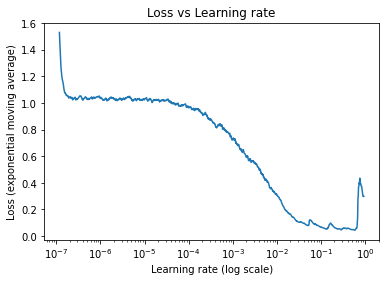

In [18]:
lrf.plot()

# Plot results

In [ ]:
from visual import plot_training
fig = plot_training(training_losses, validation_losses, lr_rates, gaussian=True, sigma=1, figsize=(10, 4))